# CIFAR 100 Image Classification 

 This dataset contains 100 different classes of image. Each classes contains 500 images in training set and 100 images in test set therefore we can say the data is properly organised.  All images are colored and have `3 channels` of dimensions `32 x 32` . We will be applying different Deep Learning approaches to get the best outputs from this dataset. 
 
 I would like to mention [This site](https://www.kaggle.com/minbavel/cifar-100-images) from where I took the dataset on which I will be working on . I would also like to thank Jovian.ai team and [Aakash N S](https://jovian.ai/aakashns)(Founder of Jovian.ai) for whom this project and this course on Deep Learnig with pytorch was possible . I am doing this Project with the help of the notebooks and course material provided in the [Deep Learning with pytorch : Zero To Gans](https://jovian.ml/forum/c/pytorch-zero-to-gans/18) course. This course is uploaded in You Tube for Free in freecodecamp.org YouTube Channel.  

In [ ]:
#!pip install opendatasets --upgrade -q
#!pip install jovian --upgrade -q

In [2]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import os
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.models as models
import matplotlib.pyplot as plt
import opendatasets as od

torch.manual_seed(0)
np.random.seed(0)

from qtorch.quant import Quantizer, quantizer
from qtorch.optim import OptimLP
from torch.optim import SGD
from qtorch import FloatingPoint, Posit
# define two floating point formats
bit_8 = Posit(nsize=8, es=2)
bit_8_scale = Posit(nsize=8, es=2, scale=1.0)
bit_16 = Posit(nsize=16, es=2)
conf_grad_scale = 16


%matplotlib inline

/home/minh/miniconda2/envs/py37-all/lib/python3.7/site-packages/setuptools/distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "


Using /home/minh/torch_extension as PyTorch extensions root...
Emitting ninja build file /home/minh/torch_extension/quant_cpu/build.ninja...
Building extension module quant_cpu...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
Loading extension module quant_cpu...
Using /home/minh/torch_extension as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/minh/torch_extension/quant_cuda/build.ninja...
Building extension module quant_cuda...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
Loading extension module quant_cuda...


In [3]:
# dataset_url = 'https://www.kaggle.com/minbavel/cifar-100-images'
# od.download(dataset_url)

## How to get Kaggle Key and Username?

1. Sign in to https://kaggle.com/, then click on your profile picture on the top right and select "My Account" from the menu
2. Scroll down to the "API" section and click "Create New API Token". This will download a file kaggle.json with the following contents: {"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_KEY"}
3. When you run opendatsets.download, you will be asked to enter your username & Kaggle API, which you can get from the file downloaded in step 2.

In [4]:
project_name="Cifar-100"

## Preparing the Data

Let's begin by downloading the dataset and creating PyTorch datasets to load the data.

Here in my Project I will be using dataset that is already present in Kaggle data section. 
I am using CIFAR 100 dataset from https://www.kaggle.com/minbavel/cifar-100-images

In [5]:
# I dowloaded the dataset using OpenDataset Library and by entering my Kaggle Key and Kaggle Username
# Let's look into the data directory
data_dir = './cifar-100-images/CIFAR100'
#data_dir = '/home/minh/github/pytorch-cifar100/data/cifar-100-python'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/TRAIN")
print(classes[:10])
print(len(classes))

['TEST', 'TRAIN']
['maple_tree', 'snail', 'porcupine', 'girl', 'elephant', 'raccoon', 'crocodile', 'plain', 'sunflower', 'train']
100


In [6]:
# Let's evaluate a single class say "man"
man_file=os.listdir(data_dir+"/TRAIN/man")
print("NO. of Training examples for Man:",len(man_file))
print(man_file[:5])

NO. of Training examples for Man: 500
['adam_s_002419.png', 'adam_s_000812.png', 'man_s_001645.png', 'man_s_000427.png', 'man_s_001702.png']


In [7]:
# Let's see how many number of files/images are present in each classes
di={}
for i in classes:
    di[i]=len(os.listdir(data_dir+"/TRAIN/"+i))
print(di)

{'maple_tree': 500, 'snail': 500, 'porcupine': 500, 'girl': 500, 'elephant': 500, 'raccoon': 500, 'crocodile': 500, 'plain': 500, 'sunflower': 500, 'train': 500, 'cattle': 500, 'baby': 500, 'camel': 500, 'shrew': 500, 'chair': 500, 'tank': 500, 'willow_tree': 500, 'castle': 500, 'man': 500, 'seal': 500, 'possum': 500, 'lion': 500, 'cloud': 500, 'sea': 500, 'chimpanzee': 500, 'worm': 500, 'motorcycle': 500, 'hamster': 500, 'woman': 500, 'orchid': 500, 'butterfly': 500, 'bear': 500, 'table': 500, 'fox': 500, 'mushroom': 500, 'telephone': 500, 'tractor': 500, 'boy': 500, 'plate': 500, 'rabbit': 500, 'bridge': 500, 'mouse': 500, 'wardrobe': 500, 'bowl': 500, 'palm_tree': 500, 'forest': 500, 'clock': 500, 'road': 500, 'lamp': 500, 'pear': 500, 'ray': 500, 'whale': 500, 'spider': 500, 'squirrel': 500, 'apple': 500, 'television': 500, 'lizard': 500, 'cockroach': 500, 'sweet_pepper': 500, 'kangaroo': 500, 'dolphin': 500, 'turtle': 500, 'aquarium_fish': 500, 'bicycle': 500, 'tulip': 500, 'skysc

From the above code we can see that there are 500 images per class in the training set.

# Preparing the Dataset 

### Normalization
Normalization helps get data within a range and reduces the skewness which helps learn faster and better. 

To normalize an image first we need to get the channel wise mean and standard deviation of the image, the calculation for the same is given below. 

In [8]:
average  = torch.Tensor([0,0,0])
standard_dev = torch.Tensor([0,0,0])
images = ImageFolder(data_dir+'/TRAIN', tt.ToTensor())
for image in images:
    average += image[0].mean([1,2])
    standard_dev += image[0].std([1,2])
average / len(images) , standard_dev / len(images)

(tensor([0.5071, 0.4865, 0.4409]), tensor([0.2009, 0.1984, 0.2023]))

In [9]:
# Data transforms (normalization & data augmentation)

stats = ((average / len(images)).tolist(), (standard_dev / len(images)).tolist())
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4,padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)
                        ])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])

With normalization I also applied Random Crop and Random Horizontal Flip in the image to increase randomness of each images.

In [10]:
# PyTorch datasets
train_ds = ImageFolder(data_dir+'/TRAIN', train_tfms)
valid_ds = ImageFolder(data_dir+'/TEST', valid_tfms)

Here I considered the test data as validation set cause there are a lot of classes and comparitvely less images per class. So, I wanted to retain as much information as possbile for the Training set, and using the test set as a validation set. 

In [11]:
# Let's use batch size
batch_size = 400

After few experimentation I found a batch size of 400 relevant for this dataset

In [12]:

# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=2, pin_memory=True)

Here are some examples after applying data augmentation and Normalization

In [13]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

After all the preprocessing let's finally look at a batch of images.

Here's a batch of **Training images**. If you look carefully you will be able to see some images has some small cropped portions in between them. Also some images are horizontally flipped, but that's not easy to tell.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


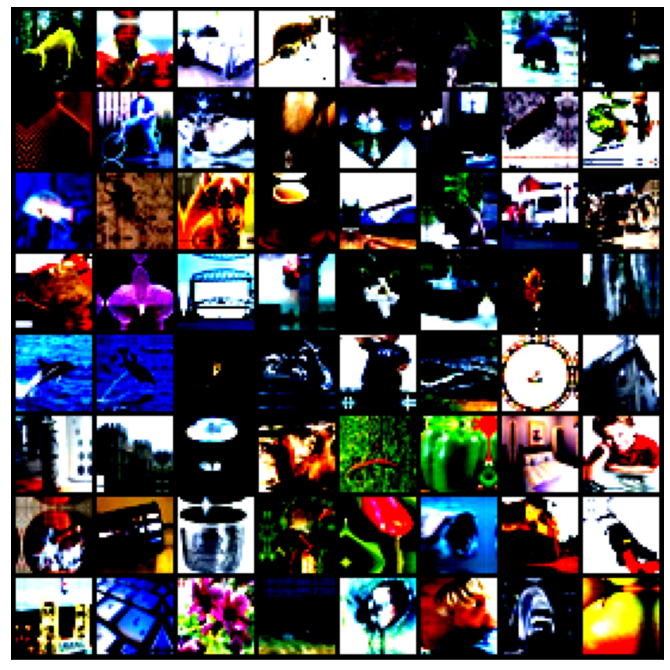

In [14]:
show_batch(train_dl);

Here's a batch from the **validation dataset**. Unlike the Training set, validation set does not havy any randomness in the images. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


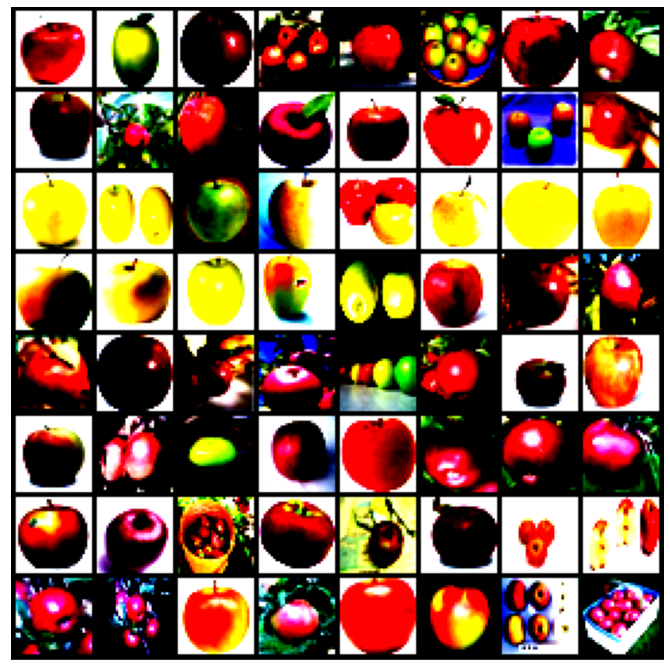

In [15]:
show_batch(valid_dl);

## Using a GPU

To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required.

In [16]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [17]:
device = get_default_device()
device

device(type='cuda')

In [18]:
# Transfering data to the device in use (In our case GPU)
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [19]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [20]:

# define quantization functions
weight_quant = quantizer(forward_number=bit_8_scale)
grad_quant = quantizer(forward_number=bit_8)
momentum_quant = quantizer(forward_number=bit_16)
acc_quant = quantizer(forward_number=bit_16)

# define a lambda function so that the Quantizer module can be duplicated easily
act_error_quant = lambda : Quantizer(forward_number=bit_8, backward_number=bit_8)

def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, quant,  in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64) # 3 x 32 x 32 -> 64 x 32 x 32
        self.conv2 = conv_block(64, 128, pool=True) # 64 x 32 x 32 -> 128 x 16 x 16
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) # 128 x 16 x 16 -> 128 x 16 x 16
        
        self.conv3 = conv_block(128, 256, pool=True) # 128 x 16 x 16 -> 256 x 8 x 8
        self.conv4 = conv_block(256, 512, pool=True) # 256 x 8 x 8 -> 512 x 4 x 4
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512)) # 512 x 4 x 4 -> 512 x 4 x 4
        self.conv5 = conv_block(512, 1028, pool=True) # 512 x 4 x 4 -> 1028 x 2 x 2
        self.res3 = nn.Sequential(conv_block(1028, 1028), conv_block(1028, 1028))  # 1028 x 2 x 2 -> 1028 x 2 x 2
        self.quant = quant()
        self.classifier = nn.Sequential(nn.MaxPool2d(2), # 1028 x 1 x 1
                                        nn.Flatten(), # 1028 
                                        nn.Linear(1028, num_classes)) # 1028 -> 100
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.quant(out)
        out = self.conv2(out)
        out = self.quant(out)
        out = self.res1(out) + out
        out = self.quant(out)
        out = self.conv3(out)
        out = self.quant(out)
        out = self.conv4(out)
        out = self.quant(out)
        out = self.res2(out) + out
        out = self.quant(out)
        out = self.conv5(out)
        out = self.quant(out)
        out = self.res3(out) + out
        out = self.quant(out)
        out = self.classifier(out)
        return out

In [21]:
model = to_device(ResNet9(act_error_quant, 3, 100), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

# Training the model



Now let's create all the necessary functions, that can be used to fit the model. Here, I will create a `fit_one_cycle()` function which will train the model over the specified number of epochs. I will set the hyperparametes that can be used for this model as a parameter to `fit_one_cycle()` function.

The `get_lr()` function is used to get the learning rate for each epoch. I am using *One Cycle Learning Rate Schedular* for this project. In this method the learning rate increases to the maximum learning rate provided till 30% of all epochs in a cycle and then gradually decreases.

In [22]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    optimizer = OptimLP(optimizer,
                    weight_quant=weight_quant,
                    grad_quant=grad_quant,
                    momentum_quant=momentum_quant,
                    acc_quant=acc_quant,
                    grad_scaling=conf_grad_scale # do loss scaling
    )
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [23]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 4.605717658996582, 'val_acc': 0.00951923057436943}]

In [24]:
epochs = 10
max_lr = 0.01
grad_clip = 0.1
weight_decay =1e-4
opt_func = torch.optim.Adam

In [25]:
#model.freeze()

In [26]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00278, train_loss: 3.7160, val_loss: 3.9304, val_acc: 0.1791
Epoch [1], last_lr: 0.00759, train_loss: 3.0805, val_loss: 3.3791, val_acc: 0.2897
Epoch [2], last_lr: 0.01000, train_loss: 2.3304, val_loss: 2.7127, val_acc: 0.3388
Epoch [3], last_lr: 0.00950, train_loss: 1.7930, val_loss: 1.9869, val_acc: 0.4811
Epoch [4], last_lr: 0.00812, train_loss: 1.4816, val_loss: 1.7054, val_acc: 0.5449
Epoch [5], last_lr: 0.00611, train_loss: 1.2121, val_loss: 1.5092, val_acc: 0.5783
Epoch [6], last_lr: 0.00389, train_loss: 0.9708, val_loss: 1.3155, val_acc: 0.6302
Epoch [7], last_lr: 0.00188, train_loss: 0.7417, val_loss: 1.1233, val_acc: 0.6785
Epoch [8], last_lr: 0.00050, train_loss: 0.5423, val_loss: 1.0691, val_acc: 0.6952
Epoch [9], last_lr: 0.00000, train_loss: 0.4367, val_loss: 1.0506, val_acc: 0.7013
CPU times: user 2min 48s, sys: 1min 3s, total: 3min 52s
Wall time: 3min 53s


In [27]:
#model.unfreeze()

In [ ]:
%%time
history += fit_one_cycle(epochs, 0.001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00028, train_loss: 0.4281, val_loss: 1.0483, val_acc: 0.7043
Epoch [1], last_lr: 0.00076, train_loss: 0.4453, val_loss: 1.1335, val_acc: 0.6885
Epoch [2], last_lr: 0.00100, train_loss: 0.4712, val_loss: 1.2032, val_acc: 0.6707
Epoch [3], last_lr: 0.00095, train_loss: 0.4209, val_loss: 1.2283, val_acc: 0.6763
Epoch [4], last_lr: 0.00081, train_loss: 0.3332, val_loss: 1.2558, val_acc: 0.6843
Epoch [5], last_lr: 0.00061, train_loss: 0.2523, val_loss: 1.2029, val_acc: 0.7017
Epoch [6], last_lr: 0.00039, train_loss: 0.1757, val_loss: 1.1900, val_acc: 0.7083
Epoch [7], last_lr: 0.00019, train_loss: 0.1300, val_loss: 1.1692, val_acc: 0.7092
Epoch [8], last_lr: 0.00005, train_loss: 0.1005, val_loss: 1.1589, val_acc: 0.7124


In [ ]:
train_time='00:22:00'

Let's plot some graphs, we will plot the graph of accuracy, losses and the learning rate trend for the entire training process.

In [ ]:
# Plotted the accuracy Graph
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
# Training and Validation loss graph
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

In [ ]:
# Learning Rate Graph
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

In [ ]:
plot_lrs(history)

# **Prediction and testing of MODEL**

This is the final part of this project where we will be testing our model and check if it can truly predict some images. 

In [ ]:
from torchvision.transforms import ToTensor
test_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])
test_dataset = ImageFolder(data_dir+'/TEST', test_tfms)

In [ ]:
dataset = ImageFolder(data_dir+'/TRAIN', transform=ToTensor())

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [ ]:

img, label = test_dataset[550]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
img, label = test_dataset[16]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:

img, label = test_dataset[117]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:

img, label = test_dataset[210]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
img, label = test_dataset[589]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

## Save and Commit

Let's save the weights of the model, record the hyperparameters, and commit our experiment to Jovian. As you try different ideas, make sure to record every experiment so you can look back and analyze the results.

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, we can redefine the model with the same structure, and use the .load_state_dict method.

In [ ]:
torch.save(model.state_dict(), 'cifar100-resnet12layers.pth')

In [ ]:
model2 = to_device(ResNet9(3, 100), device)

In [ ]:
model2.load_state_dict(torch.load('cifar100-resnet12layers.pth'))

In [ ]:
evaluate(model2, test_loader)